# Machine Learning Data Quality

In [1]:
!python3 --version

Python 3.10.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from typing import List
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

## Load Data

In [3]:
def generate_dataset(num_features: int, num_samples: int, anomaly_percent: float) -> List[float]:
    """This method will generate a random dataset with a specified 
    number of features, number of samples, and percentage of anomalies.

    Args:
        num_features: Integer representing the number of features in the dataset.
        num_samples: Integer representing the number of samples in the dataset.
        anomaly_percent: Float representing the percentage of anomalies in the dataset.

    Returns:
        X: List[float] A 2D numpy array containing the features of the dataset.
        y: List[float] A 1D numpy array containing the labels of the dataset.
    """

    # Generate random data
    X = np.random.rand(num_samples, num_features)

    # Generate random labels
    num_anomalies = int(num_samples * (anomaly_percent / 100))
    y = np.zeros(num_samples)
    y[:num_anomalies] = 1
    np.random.shuffle(y)

    return X, y

X, y = generate_dataset(num_features=5, num_samples=1000, anomaly_percent=10)

## Isolation Forest

In [4]:
# Train Isolation Forest model
iforest = IsolationForest(contamination=0.1)
iforest.fit(X)

# Evaluate Isolation Forest model
y_pred = iforest.predict(X)
print('Isolation Forest performance:')
print(classification_report(y, y_pred))


Isolation Forest performance:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00       900
         1.0       0.10      0.91      0.18       100

    accuracy                           0.09      1000
   macro avg       0.03      0.30      0.06      1000
weighted avg       0.01      0.09      0.02      1000



/Users/vatsalpatel/opt/miniconda3/envs/test_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vatsalpatel/opt/miniconda3/envs/test_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vatsalpatel/opt/miniconda3/envs/test_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

## 1 Class SVC

In [5]:
# Generate a random dataset
X, y = generate_dataset(num_features=5, num_samples=1000, anomaly_percent=10)

# Train OneClassSVM model
svm = OneClassSVM(kernel='linear', nu=0.1)
svm.fit(X)

# Evaluate OneClassSVM model
y_pred = svm.predict(X)
print('OneClassSVM performance:')
print(classification_report(y, y_pred))

OneClassSVM performance:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00       900
         1.0       0.10      0.90      0.18       100

    accuracy                           0.09      1000
   macro avg       0.03      0.30      0.06      1000
weighted avg       0.01      0.09      0.02      1000



/Users/vatsalpatel/opt/miniconda3/envs/test_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vatsalpatel/opt/miniconda3/envs/test_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vatsalpatel/opt/miniconda3/envs/test_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

## Evaluate

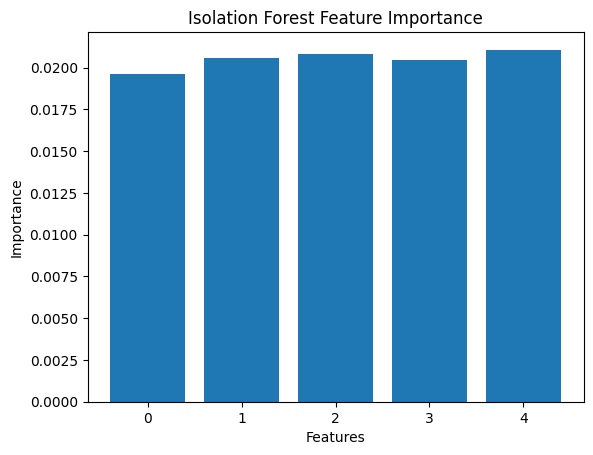

In [6]:
# Compute average path length for each feature
avg_path_length = np.mean(iforest.decision_function(X))

# Compute feature importance
iforest_importance = np.mean(iforest.decision_function(X)[:, np.newaxis] * X, axis=0)

# Plot feature importances
plt.clf()
plt.bar(np.arange(len(iforest_importance)), iforest_importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title('Isolation Forest Feature Importance')
plt.show()


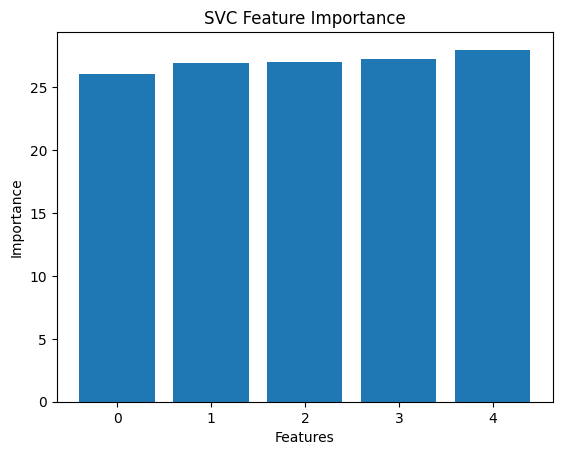

In [7]:
# Get top 10 support vectors
idx = np.argsort(np.abs(svm.coef_))[::-1]
svm_importance = svm.coef_[0][idx]

# Plot feature importances
plt.clf()
plt.bar(range(len(svm_importance[0])), svm_importance[0])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title('SVC Feature Importance')
plt.show()

---